# Name:- Parshwa Shah
# Experiment No.:- 1a
# Roll No.- 34
# UID:- 2019230071
# Batch:- B

<h2>Aim:- To implement and use Linear Regression using Python Platform </h2>

<center> <h1> Linear Regression </h1><center>

<h3> Importing the libraries </h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3> Importing the dataset </h3>

In [ ]:
dataset = pd.read_csv('german_credit_data.csv')

In [ ]:
dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


<h3> Drop unnecessary columns </h3>

In [ ]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [ ]:
dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


<h3> Check for Nan values in dataset </h3>

In [ ]:
dataset.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

<h3> Data Cleaning</h3>

In [ ]:
dataset['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
dataset['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
dataset.dropna(subset = ["Saving accounts"], inplace=True)

In [ ]:
dataset.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts       0
Checking account    295
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [ ]:
dataset.dropna(subset = ["Checking account"], inplace=True)

In [ ]:
dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,female,2,own,little,moderate,5951,48,radio/TV
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
7,35,male,3,rent,little,moderate,6948,36,car
9,28,male,3,own,little,moderate,5234,30,car
...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV
993,30,male,3,own,little,little,3959,36,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
998,23,male,2,free,little,little,1845,45,radio/TV


<h3> Exploratory Data Analysis </h3>

<AxesSubplot:>

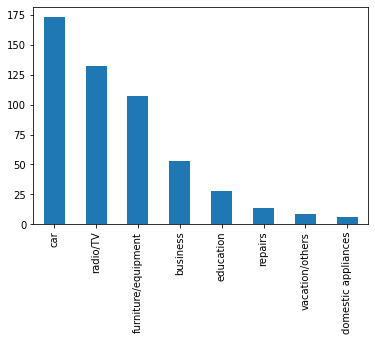

In [ ]:
dataset['Purpose'].value_counts().plot(kind='bar')

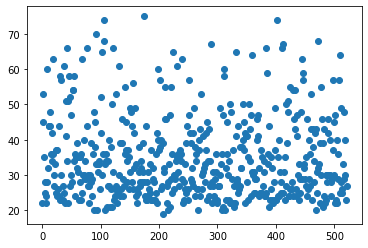

In [ ]:
plt.scatter(np.arange(522), dataset['Age'])

<AxesSubplot:xlabel='Age', ylabel='Credit amount'>

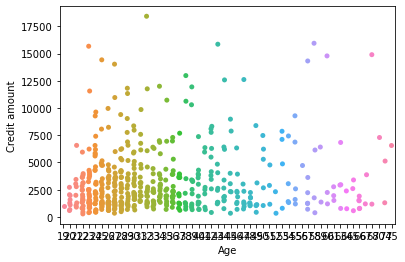

In [ ]:
import seaborn as sns
sns.stripplot(x='Age', y='Credit amount', data=dataset)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Housing', ylabel='Credit amount'>

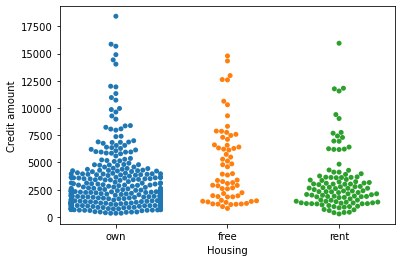

In [ ]:
sns.swarmplot(x='Housing', y='Credit amount', data=dataset)

<AxesSubplot:xlabel='Job', ylabel='Credit amount'>

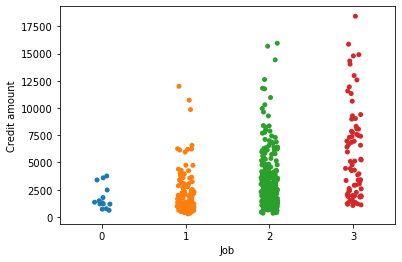

In [ ]:
sns.stripplot(x='Job', y='Credit amount', data=dataset)

In [ ]:
dataset.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

<h3> One Hot Encoding of Categorical columns</h3>

In [ ]:
encdata = pd.get_dummies(dataset, columns = ['Sex', 'Job','Housing','Saving accounts','Checking account','Purpose'])

In [ ]:
encdata

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
1,22,5951,48,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,45,7882,42,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,53,4870,24,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
7,35,6948,36,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
9,28,5234,30,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,48,1743,24,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
993,30,3959,36,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
996,40,3857,30,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
998,23,1845,45,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


<h3> Divide dataset into X and y </h3>

In [ ]:
y = encdata[['Credit amount']]
y

,Credit amount
1,5951
3,7882
4,4870
7,6948
9,5234
...,...
989,1743
993,3959
996,3857
998,1845


In [ ]:
X = encdata.drop(['Credit amount'], axis=1)

In [ ]:
X

,Age,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,Housing_own,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
1,22,48,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,45,42,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,53,24,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7,35,36,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
9,28,30,0,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,48,24,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
993,30,36,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
996,40,30,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
998,23,45,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


<h3> Apply MinMaxScaler on data </h3>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(X)

<h3> Split the dataset into 80% training set and 20% test set/h3>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<h3> Apply the Linear Regression regressor </h3>

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

<h3> Print Mean Absolute Error and Mean Squared Error </h3>

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MAE=",mean_absolute_error(y_test, y_pred))
print("MSE=",mean_squared_error(y_test, y_pred))

MAE= 1531.7333333333333
MSE= 4744537.371428572


<h3> Conclusion:-</h3> Hence, from this experiment, I understood the concept of regression. Also, I performed EDA on German Credit Dataset and applied Linear Regression after it and achieved an MAE of 1531.